In [28]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle

In [29]:
# Load data
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\final_project\car_insurance\Sourse\cleaned_data.csv")
data

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,51.587359,5.0,64.423077,C1,4990,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,67.261851,2.0,37.500000,C2,27003,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,84.111026,2.0,38.461538,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,90.027656,11.0,43.269231,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,59.640281,11.0,63.461538,C5,34738,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57366,35.508931,13.0,64.423077,C8,8794,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
57367,119.964162,2.0,51.923077,C14,7788,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
57368,116.227251,5.0,45.192308,C5,34738,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
57369,123.630690,14.0,55.769231,C8,8794,1,B2,M6,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [30]:
# Drop 'policy_id' column
data.drop(['engine_type','area_cluster', 'population_density', 'make', 'model'], axis=1, inplace=True)

# Replace ['No', 'Yes'] with [0, 1]
data = data.replace({'No':0,'Yes':1})

# Separate numerical and object data
numerical_data = data.select_dtypes(["float64", "int64"])
object_data = data.select_dtypes(["object"])

# One-hot encode categorical variables
categorical_data = pd.get_dummies(object_data)

# Combine numerical and categorical data
data = pd.concat([numerical_data, categorical_data], axis=1)

# Split data into features and target variable
X = data.drop('is_claim', axis=1)
y = data['is_claim']


In [31]:
# Handle class imbalance using SMOTEENN
smt = SMOTEENN()
X, y = smt.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y)))


Resampled dataset shape Counter({1: 40828, 0: 33115})


In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Scale features using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [34]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [35]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'accuracy_score': accuracy_score(y_test, y_pred)
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print(f"Accuracy Score: {metrics['accuracy_score']}\n")


Model: Random Forest
Confusion Matrix:
[[6325  244]
 [ 277 7943]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6569
           1       0.97      0.97      0.97      8220

    accuracy                           0.96     14789
   macro avg       0.96      0.96      0.96     14789
weighted avg       0.96      0.96      0.96     14789

Accuracy Score: 0.9647711136655622

Model: XGBoost
Confusion Matrix:
[[6346  223]
 [ 949 7271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6569
           1       0.97      0.88      0.93      8220

    accuracy                           0.92     14789
   macro avg       0.92      0.93      0.92     14789
weighted avg       0.93      0.92      0.92     14789

Accuracy Score: 0.9207519102035296

Model: Decision Tree
Confusion Matrix:
[[6053  516]
 [ 461 7759]]
Classification Report:
             

In [36]:
# Choose the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy_score'])
best_model = models[best_model_name]  # Get the model instance, not the metrics
print(f"Best model: {best_model_name}")

Best model: Random Forest


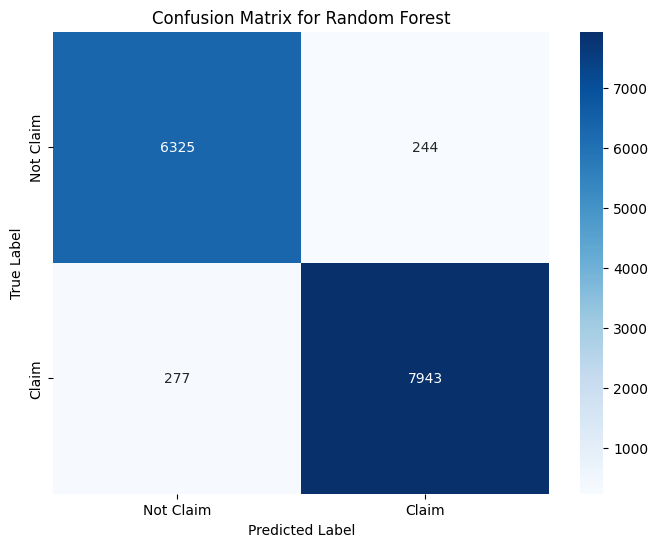

In [37]:
# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Claim', 'Claim'], 
            yticklabels=['Not Claim', 'Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

Optimal Threshold: 0.54
F1 Score at Optimal Threshold: 0.9685873492131529


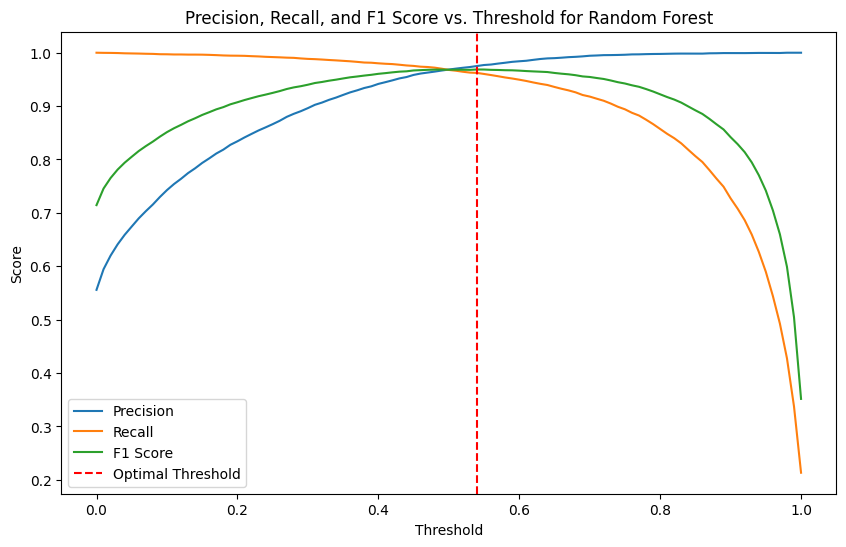

Confusion Matrix with Optimal Threshold:
[[6367  202]
 [ 311 7909]]
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6569
           1       0.98      0.96      0.97      8220

    accuracy                           0.97     14789
   macro avg       0.96      0.97      0.96     14789
weighted avg       0.97      0.97      0.97     14789

Accuracy Score with Optimal Threshold: 0.9653120562580296



In [38]:
# Predict probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 scores for each threshold (excluding the last element)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')
print(f'F1 Score at Optimal Threshold: {f1_scores[optimal_idx]}')

# Visualize precision, recall, and F1 score against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title(f'Precision, Recall, and F1 Score vs. Threshold for {best_model_name}')
plt.legend()
plt.show()

# Apply the optimal threshold to convert probabilities into class predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Evaluate the model with the new threshold
print(f"Confusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_optimal))
print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))
print(f"Accuracy Score with Optimal Threshold: {accuracy_score(y_test, y_pred_optimal)}\n")


In [39]:
# # Save the best model and scaler for deployment
# joblib.dump(best_model, 'best_model.pkl')
# joblib.dump(sc, 'scaler.pkl')
# with open('feature_columns.pkl', 'wb') as f:
#     joblib.dump(X.columns.tolist(), f)
# print("Best model and scaler saved successfully.")

In [40]:
# !pipreqs ./

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
